In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
# Read in the data
df_ptm = pd.read_csv('../multimer-ptm.csv',header=0,names=['id','RankConf'])
df_pdockq= pd.read_csv('../multimer-pdockq.csv',header=0,names=["foo","id","Name","Num","Chain","pDockQ"])
df_pdockq2=pd.read_csv("../multimer-pdockq_v21.csv",names=["foo","id","Name","Chain","pDockQ2","ifPAE","ifPAEnorm","ifPLDDT","ifRes"],sep=",")

df_pdockq2

foo             id                                  Name Chain  \
0     multimer  A6ND01-A1L0T0  unrelaxed_model_1_multimer_v3_pred_1     B   
1     multimer  A6ND01-A1L0T0  unrelaxed_model_1_multimer_v3_pred_1     C   
2     multimer  A6ND01-A6ND01  unrelaxed_model_1_multimer_v3_pred_1     B   
3     multimer  A6ND01-A6ND01  unrelaxed_model_1_multimer_v3_pred_1     C   
4     multimer  A6ND01-A6NF34  unrelaxed_model_1_multimer_v3_pred_1     B   
...        ...            ...                                   ...   ...   
3535  multimer  W5XKT8-Q9Y6M0  unrelaxed_model_1_multimer_v3_pred_1     C   
3536  multimer  W5XKT8-Q9Y6X5  unrelaxed_model_1_multimer_v3_pred_1     B   
3537  multimer  W5XKT8-Q9Y6X5  unrelaxed_model_1_multimer_v3_pred_1     C   
3538  multimer  W5XKT8-W5XKT8  unrelaxed_model_1_multimer_v3_pred_1     B   
3539  multimer  W5XKT8-W5XKT8  unrelaxed_model_1_multimer_v3_pred_1     C   

       pDockQ2      ifPAE  ifPAEnorm    ifPLDDT     ifRes  
0     0.028931  14.876114   0.311237  88.265333  0.274714  
1     0.028931  14.876114   0.311237  88.265333  0.274714  
2     0.011822  25.237369   0.135699  79.155682  0.107414  
3     0.011822  25.237369   0.135699  79.155682  0.107414  
4     0.011116  24.421916   0.143589  65.937867  0.094680  
...        ...        ...        ...        ...       ...  
3535  0.012280  20.793428   0.187840  61.307241  0.115160  
3536  0.010703  26.575734   0.124028  69.938000  0.086743  
3537  0.010703  26.575734   0.124028  69.938000  0.086743  
3538  0.011479  26.009554   0.128784  78.705000  0.101359  
3539  0.011479  26.009554   0.128784  78.705000  0.101359  

[3540 rows x 9 columns]

In [106]:
df_ptm_notemp = pd.read_csv('../multimer_notemplate-ptm.csv',header=0,names=['id','RankConf'])
df_pdockq_notemp= pd.read_csv('../multimer_notemplate-pdockq.csv',header=0,names=["foo","id","Name","Num","Chain","pDockQ"])
df_pdockq2_notemp=pd.read_csv("../multimer_notemplate-pdockq_v21.csv",names=["foo","id","Name","Chain","pDockQ2","ifPAE","ifPAEnorm","ifPLDDT","ifRes"],sep=",")

df_pdockq

foo             id  \
0     multimer_notemplate  A6ND01-A1L0T0   
1     multimer_notemplate  A6ND01-A6ND01   
2     multimer_notemplate  A6ND01-A6ND01   
3               multimer2  A6ND01-A6NF34   
4               multimer2  A6ND01-A6NF34   
...                   ...            ...   
3534  multimer_notemplate  W5XKT8-Q9Y6M0   
3535  multimer_notemplate  W5XKT8-Q9Y6X5   
3536  multimer_notemplate  W5XKT8-Q9Y6X5   
3537  multimer_notemplate  W5XKT8-W5XKT8   
3538  multimer_notemplate  W5XKT8-W5XKT8   

                                      Name  Num Chain    pDockQ  
0     unrelaxed_model_1_multimer_v3_pred_1    1     C  0.418089  
1     unrelaxed_model_1_multimer_v3_pred_1    0     B  0.241320  
2     unrelaxed_model_1_multimer_v3_pred_1    1     C  0.247466  
3     unrelaxed_model_1_multimer_v3_pred_1    0     B  0.151889  
4     unrelaxed_model_1_multimer_v3_pred_1    1     C  0.232337  
...                                    ...  ...   ...       ...  
3534  unrelaxed_model_1_multimer_v3_pred_1    1     C  0.093632  
3535  unrelaxed_model_1_multimer_v3_pred_1    0     B  0.263172  
3536  unrelaxed_model_1_multimer_v3_pred_1    1     C  0.551696  
3537  unrelaxed_model_1_multimer_v3_pred_1    0     B  0.039278  
3538  unrelaxed_model_1_multimer_v3_pred_1    1     C  0.042953  

[3539 rows x 6 columns]

In [ ]:
names={
    "supercomplex3a":"DCST1+DCST2",
    "supercomplex3b":"TMEM81",
    "supercomplex3c":"TMEM95",
    "supercomplex3d":"IZUMO2",
    "supercomplex3e":"IZUMO3",
    "supercomplex3f":"IZUMO4",
    "supercomplex3g":"FIMP",
    "supercomplex3h":"SOF1",
    "supercomplex3i":"MAIA",
    "supercomplex3j":"FREY",
    "supercomplex3k":"CEACAM5"
    }
names

In [32]:
df_eggsperm = pd.read_csv('../data/summary.csv')
#df_eggsperm[["id","model"]]=df_eggsperm["name"].str.replace("complexes//","").str.split("/",expand=True)
#df_eggsperm[["id1","id2"]]=df_eggsperm["id"].str.split("-",expand=True)
#df_eggsperm["id1"]=df_eggsperm["id1"].str.replace("e_","").str.replace("s_","").str.replace("_hosa","")
#df_eggsperm["id2"]=df_eggsperm["id2"].str.replace("e_","").str.replace("s_","").str.replace("_hosa","")
#df_eggsperm.drop(["name","max_predicted_aligned_error","pLDDT","maxPAE"],axis=1,inplace=True)
#df_eggsperm.rename(columns={'rankconf': 'RankConf'}, inplace=True)
#df_eggsperm.rename(columns={'iptm': 'ipTM'}, inplace=True)
#df_eggsperm.rename(columns={'ptm': 'pTM'}, inplace=True)
#df_eggsperm.rename(columns={'name1': 'id1'}, inplace=True)
#df_eggsperm.rename(columns={'name2': 'id2'}, inplace=True)
df_eggsperm["id1"]=df_eggsperm["type1"]+"_"+df_eggsperm["name1"]  
df_eggsperm["id2"]=df_eggsperm["type2"]+"_"+df_eggsperm["name2"]  

df_eggsperm.id1.unique()
df_eggsperm.keys()


Index(['Unnamed: 0', 'pTM', 'ipTM', 'RankConf', 'type1', 'name1', 'type2',
       'name2', 'model', 'num', 'id', 'target', 'rank', 'pDockQ', 'rankpDockq',
       'pDockQ2', 'PAE', 'PAEnorm', 'pLDDT', 'numres', 'rankpDockq2',
       'PconsDockQ', 'homo', 'type', 'id1', 'id2'],
      dtype='object')

In [9]:
#df_eggsperm = pd.read_csv('../data/summary.csv')
#df_eggsperm.loc[(df_eggsperm.type1=="s")&(df_eggsperm.type2=="s")].name1.unique()

array(['hDCST1f', 'hDCST2f', 'hFIMPe', 'hIZUMO1e', 'hIZUMO2e', 'hIZUMO3e',
       'hIZUMO4f', 'hSOF1f', 'hSPACA6e', 'hTMEM81e', 'hTMEM95e'],
      dtype=object)

In [49]:
#df_old=df_eggsperm.loc[(df_eggsperm["rank"]==1)]
df_old=df_eggsperm.groupby(["id1","id2"])[['pTM', 'ipTM', 'RankConf','pDockQ2', 'PAE', 'PAEnorm', 'pLDDT', 'numres', 'rankpDockq2',
       'PconsDockQ']].mean().reset_index()
df_old.to_csv("../data/mean.csv",index=False)


In [54]:
df_eggsperm.id1.unique()

array(['ASTLi1', 'CD81', 'CD9', 'JUNO', 'ZP1', 'ZP2', 'ZP3', 'ZP4',
       'ACROchA', 'ACROchB', 'ADAM2i1', 'B4GT1', 'CD46', 'CLGNi2',
       'CRISP1i2', 'DCST1', 'DCST2', 'FIMPi1', 'IZUMO1', 'IZUMO2',
       'IZUMO3', 'IZUMO4', 'LLCFC1', 'PRSS21', 'SED1i1', 'SPACA1',
       'SPACA3', 'SPACA4', 'SPACA5', 'SPACA6', 'SPACA7', 'SPACA9',
       'TMEM95', 'ZPBP1', 'ZPBP2'], dtype=object)

In [114]:
df=pd.merge(df_ptm,df_pdockq.loc[df_pdockq.Chain=="B"],on='id')
df=df.drop(['foo','Name','Num','Chain'],axis=1)
df=pd.merge(df,df_pdockq2.loc[df_pdockq2.Chain=="B"],on='id')   
df=df.drop(['foo','Name','Chain'],axis=1)
df=df.drop(['ifPAE','ifPAEnorm','ifPLDDT','ifRes'],axis=1)
df

id  RankConf    pDockQ   pDockQ2
0     A6ND01-A6ND01  0.179539  0.306708  0.011822
1     A6ND01-A6NF34  0.221901  0.104635  0.011116
2     A6ND01-A6NFU0  0.239150  0.254376  0.014655
3     A6ND01-A6NM11  0.305286  0.601974  0.010943
4     A6ND01-O00238  0.251765  0.430911  0.013635
...             ...       ...       ...       ...
1760  W5XKT8-Q9Y625  0.234916  0.137301  0.010137
1761  W5XKT8-Q9Y639  0.232823  0.307943  0.013186
1762  W5XKT8-Q9Y6M0  0.245192  0.181266  0.012280
1763  W5XKT8-Q9Y6X5  0.274284  0.147236  0.010703
1764  W5XKT8-W5XKT8  0.164570  0.055446  0.011479

[1765 rows x 4 columns]

In [115]:
df[["id1","id2"]]=df["id"].str.split("-",expand=True)
names={
    "P21926":"CD9",
    "A6ND01":"JUNO",
    'Q6P7N7':"TMEM81",
    'Q8IYV9':"IZUMO1",
    'W5XKT8':"SPACA6"
}
#df=df.replace({"Names": names})
df.replace({"id1":names,"id2":names},inplace=True)
NAMES=list(names.values())

df.id1.unique()

array(['JUNO', 'CD9', 'TMEM81', 'IZUMO1', 'SPACA6'], dtype=object)

In [108]:
df_notemp=pd.merge(df_ptm_notemp,df_pdockq_notemp.loc[df_pdockq_notemp.Chain=="B"],on='id')
df_notemp=df_notemp.drop(['foo','Name','Num','Chain'],axis=1)
df_notemp=pd.merge(df_notemp,df_pdockq2_notemp.loc[df_pdockq2_notemp.Chain=="B"],on='id')   
df_notemp=df_notemp.drop(['foo','Name','Chain'],axis=1)
df_notemp=df_notemp.drop(['ifPAE','ifPAEnorm','ifPLDDT','ifRes'],axis=1)
df_notemp


id  RankConf    pDockQ   pDockQ2
0     A6ND01-A6ND01  0.180396  0.241320  0.011706
1     A6ND01-A6NF34  0.220734  0.151889  0.011520
2     A6ND01-A6NFU0  0.247399  0.236762  0.015027
3     A6ND01-A6NM11  0.460582  0.465629  0.018964
4     A6ND01-O00238  0.237430  0.401950  0.012285
...             ...       ...       ...       ...
1764  W5XKT8-Q9Y625  0.539265  0.563889  0.062957
1765  W5XKT8-Q9Y639  0.228001  0.259753  0.012801
1766  W5XKT8-Q9Y6M0  0.260073  0.111620  0.012621
1767  W5XKT8-Q9Y6X5  0.273487  0.263172  0.010642
1768  W5XKT8-W5XKT8  0.164605  0.039278  0.008607

[1769 rows x 4 columns]

In [109]:
df_notemp[["id1","id2"]]=df_notemp["id"].str.split("-",expand=True)
names={
    "P21926":"CD9",
    "A6ND01":"JUNO",
    'Q6P7N7':"TMEM81",
    'Q8IYV9':"IZUMO1",
    'W5XKT8':"SPACA6"
}
#df=df.replace({"Names": names})
df_notemp.replace({"id1":names,"id2":names},inplace=True)
NAMES=list(names.values())

df_notemp.id1.unique()

array(['JUNO', 'CD9', 'TMEM81', 'IZUMO1', 'SPACA6'], dtype=object)

In [118]:
df_test=pd.merge(df_old,df,on=['id1','id2'])
df_test

pTM      ipTM  RankConf_x                         id_x  \
0  0.507926  0.125121    0.201682       e_CD9_hosa-e_JUNO_hosa   
1  0.456091  0.133849    0.198298     e_CD9_hosa-s_IZUMO1_hosa   
2  0.445565  0.120030    0.185137     e_CD9_hosa-s_SPACA6_hosa   
3  0.797930  0.851503    0.840788    e_JUNO_hosa-s_IZUMO1_hosa   
4  0.470548  0.129466    0.197682    e_JUNO_hosa-s_SPACA6_hosa   
5  0.431618  0.126418    0.187458  s_IZUMO1_hosa-s_SPACA6_hosa   
6  0.518710  0.265970    0.316518        e_CD9_hosa-e_CD9_hosa   
7  0.558894  0.188631    0.262683      e_JUNO_hosa-e_JUNO_hosa   
8  0.421297  0.089634    0.155967  s_IZUMO1_hosa-s_IZUMO1_hosa   
9  0.423100  0.106409    0.169747  s_SPACA6_hosa-s_SPACA6_hosa   

                                    model     id1     id2           id_y  \
0  result_model_1_multimer_v2_pred_0.pkl      CD9    JUNO  P21926-A6ND01   
1  result_model_1_multimer_v2_pred_0.pkl      CD9  IZUMO1  P21926-Q8IYV9   
2  result_model_1_multimer_v2_pred_0.pkl      CD9  SPACA6  P21926-W5XKT8   
3  result_model_1_multimer_v2_pred_0.pkl     JUNO  IZUMO1  A6ND01-Q8IYV9   
4  result_model_1_multimer_v2_pred_0.pkl     JUNO  SPACA6  A6ND01-W5XKT8   
5  result_model_1_multimer_v2_pred_0.pkl   IZUMO1  SPACA6  Q8IYV9-W5XKT8   
6  result_model_1_multimer_v2_pred_0.pkl      CD9     CD9  P21926-P21926   
7  result_model_1_multimer_v2_pred_0.pkl     JUNO    JUNO  A6ND01-A6ND01   
8  result_model_1_multimer_v2_pred_0.pkl   IZUMO1  IZUMO1  Q8IYV9-Q8IYV9   
9  result_model_1_multimer_v2_pred_0.pkl   SPACA6  SPACA6  W5XKT8-W5XKT8   

   RankConf_y    pDockQ   pDockQ2  
0    0.224284  0.550655  0.019190  
1    0.533706  0.477735  0.030973  
2    0.265260  0.316333  0.012708  
3    0.732358  0.617550  0.593414  
4    0.490350  0.199080  0.041487  
5    0.448813  0.565644  0.074840  
6    0.279766  0.371796  0.016901  
7    0.179539  0.306708  0.011822  
8    0.165944  0.258440  0.010673  
9    0.164570  0.055446  0.011479

<AxesSubplot:xlabel='RankConf_x', ylabel='RankConf_y'>

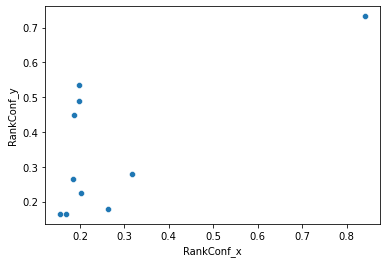

In [119]:
sns.scatterplot(data=df_test,x="RankConf_x",y="RankConf_y")

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

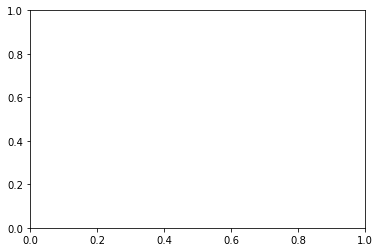

In [66]:
fig, ax = plt.subplots()

#sns.kdeplot(data=df, x="pDockQ2", ax=ax, label="pDockQ2")
sns.kdeplot(data=df, x="RankConf", ax=ax, label="RankConf")

ax.set_ylabel("Density")
ax.legend()
#ax.set_yscale('log')

# Add markers for x values
RC_X = df.loc[(df.id1=="IZUMO1") & (df.id2=="JUNO")]["RankConf"].to_list()[0]
#RC_pDockQ2 = df.loc[(df.id1=="IZUMO1") & (df.id2=="JUNO")]["pDockQ2"].to_list()[0]

#print (RC_X,RC_pDockQ2)
ax.axvline(x=RC_X, color='orange', linestyle='--')
#ax.axvline(x=RC_pDockQ2, color='blue', linestyle='--')

plt.show()



In [74]:
df_sorted = df.sort_values(by='RankConf')
df_sorted['Rank-RC'] = df_sorted['RankConf'].rank(method='dense', ascending=False).astype(int)
df_sorted = df_sorted.sort_values(by='pDockQ2')
df_sorted['Rank-pDockQ2'] = df_sorted['pDockQ2'].rank(method='dense', ascending=False).astype(int)
df_sorted.sort_values(by='Rank-RC')


KeyError: 'pDockQ2'

<AxesSubplot:xlabel='RankConf', ylabel='pDockQ2'>

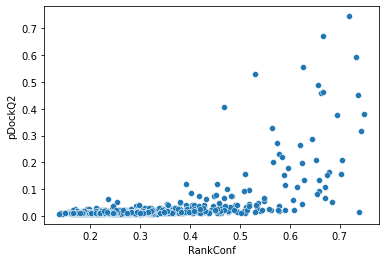

In [117]:
sns.scatterplot(data=df,x="RankConf",y="pDockQ2")

In [37]:
df.loc[df.pDockQ2>0.5]


id  RankConf    pDockQ   pDockQ2     id1     id2
184   A6ND01-Q14574  0.666150  0.528002  0.672862    Juno  Q14574
244   A6ND01-Q8IYV9  0.732358  0.617550  0.593414    Juno  IZUMO1
850   Q6P7N7-P61769  0.719199  0.446183  0.745588  TMEM81  P61769
1376  Q8IYV9-Q9NQS3  0.530352  0.398101  0.530596  IZUMO1  Q9NQS3
1576  W5XKT8-Q10471  0.625417  0.472578  0.555362  SPACA6  Q10471

In [134]:
df.loc[df.pDockQ2>0.5]


id  RankConf    pDockQ   pDockQ2     ifPAE  ifPAEnorm  \
184   A6ND01-Q14574  0.666150  0.528002  0.672862  2.590499   0.937113   
244   A6ND01-Q8IYV9  0.732358  0.617550  0.593414  2.381682   0.946321   
850   Q6P7N7-P61769  0.719199  0.446183  0.745588  2.219930   0.953034   
1376  Q8IYV9-Q9NQS3  0.530352  0.398101  0.530596  3.220606   0.906024   
1576  W5XKT8-Q10471  0.625417  0.472578  0.555362  3.082114   0.913247   

        ifPLDDT     ifRes     id1     id2  
184   92.080833  0.862902    Juno  Q14574  
244   87.761538  0.830506    Juno  IZUMO1  
850   93.552000  0.891582  TMEM81  P61769  
1376  88.694444  0.803593  IZUMO1  Q9NQS3  
1576  89.173529  0.814374  SPACA6  Q10471

In [85]:
for i in names.values():
    print(i)
    print(df.loc[(df.id1==i)&(df.RankConf>0.5)].sort_values(by="RankConf",ascending=False))


CD9
         pTM      ipTM  RankConf                          id  \
390  0.61614  0.707669  0.689363  e_CD9_hosa-s_CRISP1i2_hosa   

                                      model  id1       id2  
390  result_model_1_multimer_v2_pred_0.pkl   CD9  CRISP1i2  
JUNO
          pTM      ipTM  RankConf                         id  \
565  0.797930  0.851503  0.840788  e_JUNO_hosa-s_IZUMO1_hosa   
630  0.645922  0.507918  0.535519  e_JUNO_hosa-s_SPACA9_hosa   

                                      model   id1     id2  
565  result_model_1_multimer_v2_pred_0.pkl   JUNO  IZUMO1  
630  result_model_1_multimer_v2_pred_0.pkl   JUNO  SPACA9  
TMEM81
Empty DataFrame
Columns: [pTM, ipTM, RankConf, id, model, id1, id2]
Index: []
IZUMO1
Empty DataFrame
Columns: [pTM, ipTM, RankConf, id, model, id1, id2]
Index: []
SPACA6
Empty DataFrame
Columns: [pTM, ipTM, RankConf, id, model, id1, id2]
Index: []


In [130]:
df.id1.unique()

array(['Juno', 'CD9', 'TMEM81', 'IZUMO1', 'SPACA6'], dtype=object)

In [92]:
df.loc[(df.id1.isin(NAMES))&(df.id2.isin(NAMES))].sort_values(by="RankConf",ascending=False)

id  RankConf    pDockQ   pDockQ2     id1     id2
1060  Q8IYV9-A6ND01  0.736397  0.479325  0.451075  IZUMO1    Juno
244   A6ND01-Q8IYV9  0.732358  0.617550  0.593414    Juno  IZUMO1
597   P21926-Q8IYV9  0.533706  0.477735  0.030973     CD9  IZUMO1
1158  Q8IYV9-P21926  0.517603  0.087865  0.044677  IZUMO1     CD9
352   A6ND01-W5XKT8  0.490350  0.199080  0.041487    Juno  SPACA6
1656  W5XKT8-Q8IYV9  0.454581  0.458784  0.023833  SPACA6  IZUMO1
1411  Q8IYV9-W5XKT8  0.448813  0.565644  0.074840  IZUMO1  SPACA6
1270  Q8IYV9-Q6P7N7  0.407729  0.144308  0.040436  IZUMO1  TMEM81
950   Q6P7N7-Q8IYV9  0.402266  0.279383  0.084053  TMEM81  IZUMO1
1413  W5XKT8-A6ND01  0.329679  0.289573  0.019525  SPACA6    Juno
805   Q6P7N7-P21926  0.284124  0.119751  0.014477  TMEM81     CD9
452   P21926-P21926  0.279766  0.371796  0.016901     CD9     CD9
1511  W5XKT8-P21926  0.274661  0.153529  0.012335  SPACA6     CD9
564   P21926-Q6P7N7  0.265908  0.236294  0.012987     CD9  TMEM81
705   P21926-W5XKT8  0.265260  0.316333  0.012708     CD9  SPACA6
707   Q6P7N7-A6ND01  0.252652  0.113745  0.012549  TMEM81    Juno
1623  W5XKT8-Q6P7N7  0.244941  0.395140  0.037401  SPACA6  TMEM81
1058  Q6P7N7-W5XKT8  0.234986  0.051579  0.062066  TMEM81  SPACA6
354   P21926-A6ND01  0.224284  0.550655  0.019190     CD9    Juno
99    A6ND01-P21926  0.221951  0.115723  0.011665    Juno     CD9
211   A6ND01-Q6P7N7  0.203118  0.257418  0.013140    Juno  TMEM81
0     A6ND01-A6ND01  0.179539  0.306708  0.011822    Juno    Juno
1303  Q8IYV9-Q8IYV9  0.165944  0.258440  0.010673  IZUMO1  IZUMO1
1764  W5XKT8-W5XKT8  0.164570  0.055446  0.011479  SPACA6  SPACA6
917   Q6P7N7-Q6P7N7  0.161809  0.047453  0.007325  TMEM81  TMEM81

In [29]:
# Network
#import jgraph as ig
from pyvis.network import Network
import networkx as nx
import plotly.graph_objects as go


In [34]:
df_old

id1         id2       pTM      ipTM  RankConf   pDockQ2  \
0      e_hCD81f    e_hCD81f  0.549380  0.297495  0.347872  0.020520   
1      e_hCD81f    e_hMAIAe  0.472912  0.184354  0.242066  0.010480   
2      e_hCD81f   s_hDCST1f  0.476507  0.199991  0.255294  0.010006   
3      e_hCD81f   s_hDCST2f  0.399572  0.248272  0.278532  0.017953   
4      e_hCD81f    s_hFIMPe  0.605182  0.122936  0.219385  0.010420   
..          ...         ...       ...       ...       ...       ...   
115  s_hTMEM95e   s_hDCST2f  0.418704  0.180042  0.227775  0.009197   
116  s_hTMEM95e    s_hFIMPe  0.767587  0.762479  0.763500  0.470966   
117  s_hTMEM95e    s_hSOF1f  0.519535  0.266536  0.317135  0.035633   
118  s_hTMEM95e  s_hTMEM81e  0.482019  0.164794  0.228239  0.016795   
119  s_hTMEM95e  s_hTMEM95e  0.464949  0.126316  0.194043  0.010781   

           PAE   PAEnorm      pLDDT    numres  rankpDockq2  PconsDockQ  
0    16.047029  0.290318  70.922619  0.205993        13.96    0.326285  
1    27.369828  0.117906  69.853563  0.082238        13.00    0.166355  
2    20.613725  0.306488  51.564512  0.068516        12.60    0.151240  
3    21.116239  0.253481  57.242462  0.111265        12.96    0.133214  
4    21.793180  0.176036  46.306697  0.080892        13.00    0.448963  
..         ...       ...        ...       ...          ...         ...  
115  21.187415  0.302536  39.408942  0.050825        12.60    0.092707  
116   3.464800  0.890044  85.750473  0.766028        18.68    0.624162  
117  11.488020  0.458983  57.061447  0.270139        13.64    0.162010  
118  21.333183  0.196283  65.403472  0.130312        14.00    0.149166  
119  19.767777  0.303786  52.331266  0.082459        12.76    0.122739  

[120 rows x 12 columns]

In [35]:


cutoff=0.4

Gstruct=nx.from_pandas_edgelist(df_old.loc[(df_old.RankConf>cutoff)],source="id1",target="id2",edge_attr="RankConf")
netStruct=Network(notebook=True,height='1200px', width='100%',)
netStruct.from_nx(Gstruct)

#df.loc[(df.RankConf>cutoff)&(df.id1=="IZUMO1")].sort_values(["RankConf"],ascending=False) # ["id"].to_list()



In [128]:
df.loc[(df.pDockQ2>cutoff)&(df.id1=="IZUMO1")].sort_values(["RankConf"],ascending=False) # ["id"].to_list()


id  RankConf    pDockQ   pDockQ2     ifPAE  ifPAEnorm  \
1060  Q8IYV9-A6ND01  0.736397  0.479325  0.451075  3.629501   0.883601   
1376  Q8IYV9-Q9NQS3  0.530352  0.398101  0.530596  3.220606   0.906024   
1132  Q8IYV9-P13385  0.467953  0.202925  0.408082  3.638984   0.883063   

        ifPLDDT     ifRes     id1     id2  
1060  86.803929  0.767000  IZUMO1    Juno  
1376  88.694444  0.803593  IZUMO1  Q9NQS3  
1132  84.430000  0.745570  IZUMO1  P13385

In [36]:

for n in netStruct.nodes:
    n["font"] = "14px Arial black Bold"
    n["borderWidth"]=1
    n["opacity"]=50
    if (n["id"][0]=="s"):
        n["size"]=22
        n["shape"]="star"
        n["opacity"]=50
        n["Shadow"]=True
        n["color"]="red"
    else:
        #print (n["id"])
        n["size"]=12
        n["shape"]="dot"
        n["opacity"]=50
        n["Shadow"]=True
        n["color"]="blue"     
netStruct.force_atlas_2based()
netStruct.show("../figures/network-old.html")


../figures/network-old.html


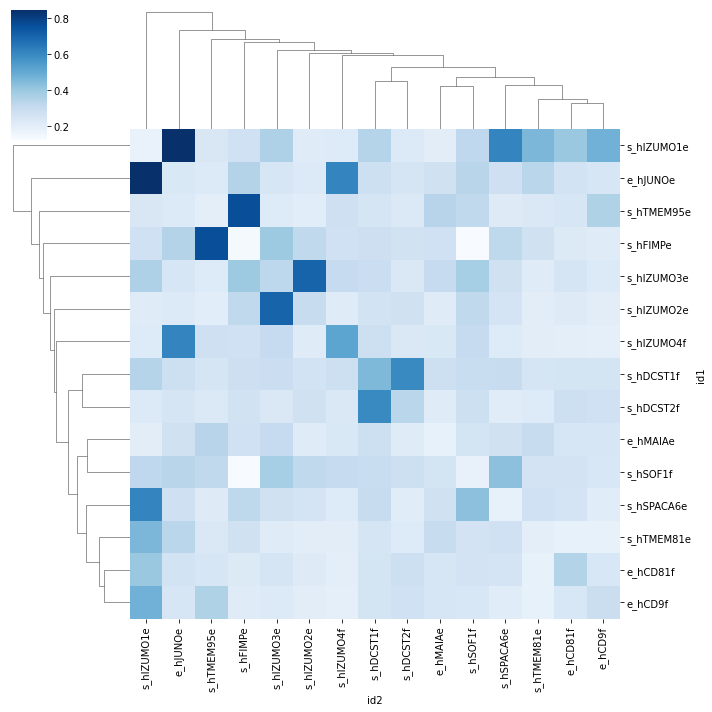

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pivot = df_old.pivot(index='id1', columns='id2', values='RankConf')
df_pivot = df_pivot.fillna(df_pivot.transpose())
df_pivot


sns.clustermap(data=df_pivot,cmap="Blues",figsize=(10,10))  
plt.show()


In [45]:
df_pivot = df_old.pivot(index='id1', columns='id2', values='RankConf')
df_pivot = df_pivot.fillna(df_pivot.transpose())
df_pivot


id2         e_hCD81f   e_hCD9f  e_hJUNOe  e_hMAIAe  s_hDCST1f  s_hDCST2f  \
id1                                                                        
e_hCD81f    0.347872  0.237234  0.259660  0.242066   0.255294   0.278532   
e_hCD9f     0.237234  0.288583  0.243974  0.243056   0.254462   0.272131   
e_hJUNOe    0.259660  0.243974  0.231734  0.267228   0.276384   0.246178   
e_hMAIAe    0.242066  0.243056  0.267228  0.181721   0.277555   0.208743   
s_hDCST1f   0.255294  0.254462  0.276384  0.277555   0.448223   0.595822   
s_hDCST2f   0.278532  0.272131  0.246178  0.208743   0.595822   0.329650   
s_hFIMPe    0.219385  0.211221  0.346325  0.271770   0.279466   0.263751   
s_hIZUMO1e  0.401732  0.474804  0.846168  0.200636   0.342683   0.224069   
s_hIZUMO2e  0.213932  0.200185  0.224340  0.209116   0.259748   0.269657   
s_hIZUMO3e  0.248208  0.222207  0.243191  0.306655   0.286982   0.229114   
s_hIZUMO4f  0.198988  0.192991  0.612353  0.231823   0.278239   0.229517   
s_hSOF1f    0.257080  0.236541  0.335404  0.254506   0.293637   0.276723   
s_hSPACA6e  0.251009  0.205915  0.273439  0.269232   0.298451   0.207110   
s_hTMEM81e  0.181892  0.180308  0.332492  0.297121   0.248777   0.219163   
s_hTMEM95e  0.242976  0.354755  0.223509  0.339190   0.247885   0.227775   

id2         s_hFIMPe  s_hIZUMO1e  s_hIZUMO2e  s_hIZUMO3e  s_hIZUMO4f  \
id1                                                                    
e_hCD81f    0.219385    0.401732    0.213932    0.248208    0.198988   
e_hCD9f     0.211221    0.474804    0.200185    0.222207    0.192991   
e_hJUNOe    0.346325    0.846168    0.224340    0.243191    0.612353   
e_hMAIAe    0.271770    0.200636    0.209116    0.306655    0.231823   
s_hDCST1f   0.279466    0.342683    0.259748    0.286982    0.278239   
s_hDCST2f   0.263751    0.224069    0.269657    0.229114    0.229517   
s_hFIMPe    0.137208    0.270945    0.315361    0.395774    0.271588   
s_hIZUMO1e  0.270945    0.175196    0.208613    0.358037    0.218724   
s_hIZUMO2e  0.315361    0.208613    0.298398    0.701138    0.213181   
s_hIZUMO3e  0.395774    0.358037    0.701138    0.324318    0.305487   
s_hIZUMO4f  0.271588    0.218724    0.213181    0.305487    0.513140   
s_hSOF1f    0.123314    0.319023    0.316272    0.375405    0.304575   
s_hSPACA6e  0.323385    0.614262    0.251905    0.267344    0.218065   
s_hTMEM81e  0.268357    0.453834    0.201060    0.208379    0.199825   
s_hTMEM95e  0.763500    0.235790    0.202870    0.218967    0.274249   

id2         s_hSOF1f  s_hSPACA6e  s_hTMEM81e  s_hTMEM95e  
id1                                                       
e_hCD81f    0.257080    0.251009    0.181892    0.242976  
e_hCD9f     0.236541    0.205915    0.180308    0.354755  
e_hJUNOe    0.335404    0.273439    0.332492    0.223509  
e_hMAIAe    0.254506    0.269232    0.297121    0.339190  
s_hDCST1f   0.293637    0.298451    0.248777    0.247885  
s_hDCST2f   0.276723    0.207110    0.219163    0.227775  
s_hFIMPe    0.123314    0.323385    0.268357    0.763500  
s_hIZUMO1e  0.319023    0.614262    0.453834    0.235790  
s_hIZUMO2e  0.316272    0.251905    0.201060    0.202870  
s_hIZUMO3e  0.375405    0.267344    0.208379    0.218967  
s_hIZUMO4f  0.304575    0.218065    0.199825    0.274249  
s_hSOF1f    0.179067    0.426119    0.257085    0.317135  
s_hSPACA6e  0.426119    0.180615    0.271703    0.214737  
s_hTMEM81e  0.257085    0.271703    0.194606    0.228239  
s_hTMEM95e  0.317135    0.214737    0.228239    0.194043